# Objective:

Develop a predictive model to estimate the concentration of NO2 (Nitrogen Dioxide) levels based on meteorological and other air pollutant measurements.

## 🔍 Steps to Follow:
### 1. Data Acquisition & Preprocessing:
* Load the dataset from UCI and handle missing values.
* Convert timestamp data into appropriate formats (e.g., extracting hours, weekdays, seasons).
* Scale and normalize numerical features.

### 2. Exploratory Data Analysis (EDA):
* Visualize pollutant concentration trends over time.
* Analyze correlations between meteorological conditions (temperature, humidity, etc.) and pollution levels.
* Identify outliers and seasonal variations.

### 3. Feature Engineering:
* Create new features such as rolling averages or lag features for NO2 prediction.
* Encode categorical variables, if any.

### 4. Model Development:
* Train regression models to predict NO2 concentration using features such as CO, NOx, temperature, and humidity.
* Compare different models:
  * Linear Regression
  * Random Forest Regressor
  * LSTM (for time-series forecasting)
* Evaluate models using RMSE and R² scores.

## Insights & Recommendations:
* Determine the most important factors influencing air pollution.
* Suggest potential interventions based on the findings.

## Import necessary libraries

In [308]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Acquisition & Preprocessing

In [309]:
base_dir = os.path.dirname(os.getcwd())
xlsx_path = os.path.join(base_dir, 'data', 'raw', 'AirQualityUCI.xlsx')

df = pd.read_excel(xlsx_path)

In [310]:
df.head

<bound method NDFrame.head of            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    11

Missing values are tagged with -200 value.

In [311]:
df.replace(-200, np.nan, inplace=True)
df.dropna(inplace=True)

In [312]:
datetime_column = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.drop(columns=['Date', 'Time'], inplace=True)
df.insert(0, column='Datetime', value=datetime_column)

Add weekdays and months to the columns.

In [313]:
df.insert(1, column='Weekday', value=df['Datetime'].dt.dayofweek)
df.insert(2, column='Month', value=df['Datetime'].dt.month)
df.insert(3, column='Hour', value=df['Datetime'].dt.hour)

In [314]:
df.head

<bound method NDFrame.head of                 Datetime  Weekday  Month  Hour  CO(GT)  PT08.S1(CO)  NMHC(GT)  \
0    2004-03-10 18:00:00        2      3    18     2.6      1360.00     150.0   
1    2004-03-10 19:00:00        2      3    19     2.0      1292.25     112.0   
2    2004-03-10 20:00:00        2      3    20     2.2      1402.00      88.0   
3    2004-03-10 21:00:00        2      3    21     2.2      1375.50      80.0   
4    2004-03-10 22:00:00        2      3    22     1.6      1272.25      51.0   
...                  ...      ...    ...   ...     ...          ...       ...   
1226 2004-04-30 20:00:00        4      4    20     4.4      1449.25     501.0   
1227 2004-04-30 21:00:00        4      4    21     3.1      1362.50     234.0   
1228 2004-04-30 22:00:00        4      4    22     3.0      1371.25     212.0   
1229 2004-04-30 23:00:00        4      4    23     3.1      1406.25     275.0   
1230 2004-05-01 00:00:00        5      5     0     3.5      1424.50     275.0  

In [315]:
print("Basic Information:\n")
print(df.info())

Basic Information:

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 1230
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       827 non-null    datetime64[ns]
 1   Weekday        827 non-null    int32         
 2   Month          827 non-null    int32         
 3   Hour           827 non-null    int32         
 4   CO(GT)         827 non-null    float64       
 5   PT08.S1(CO)    827 non-null    float64       
 6   NMHC(GT)       827 non-null    float64       
 7   C6H6(GT)       827 non-null    float64       
 8   PT08.S2(NMHC)  827 non-null    float64       
 9   NOx(GT)        827 non-null    float64       
 10  PT08.S3(NOx)   827 non-null    float64       
 11  NO2(GT)        827 non-null    float64       
 12  PT08.S4(NO2)   827 non-null    float64       
 13  PT08.S5(O3)    827 non-null    float64       
 14  T              827 non-null    float64       
 15  RH     

In [316]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

Datetime         0
Weekday          0
Month            0
Hour             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


## EDA

### Data Distribution


Data Distribution:


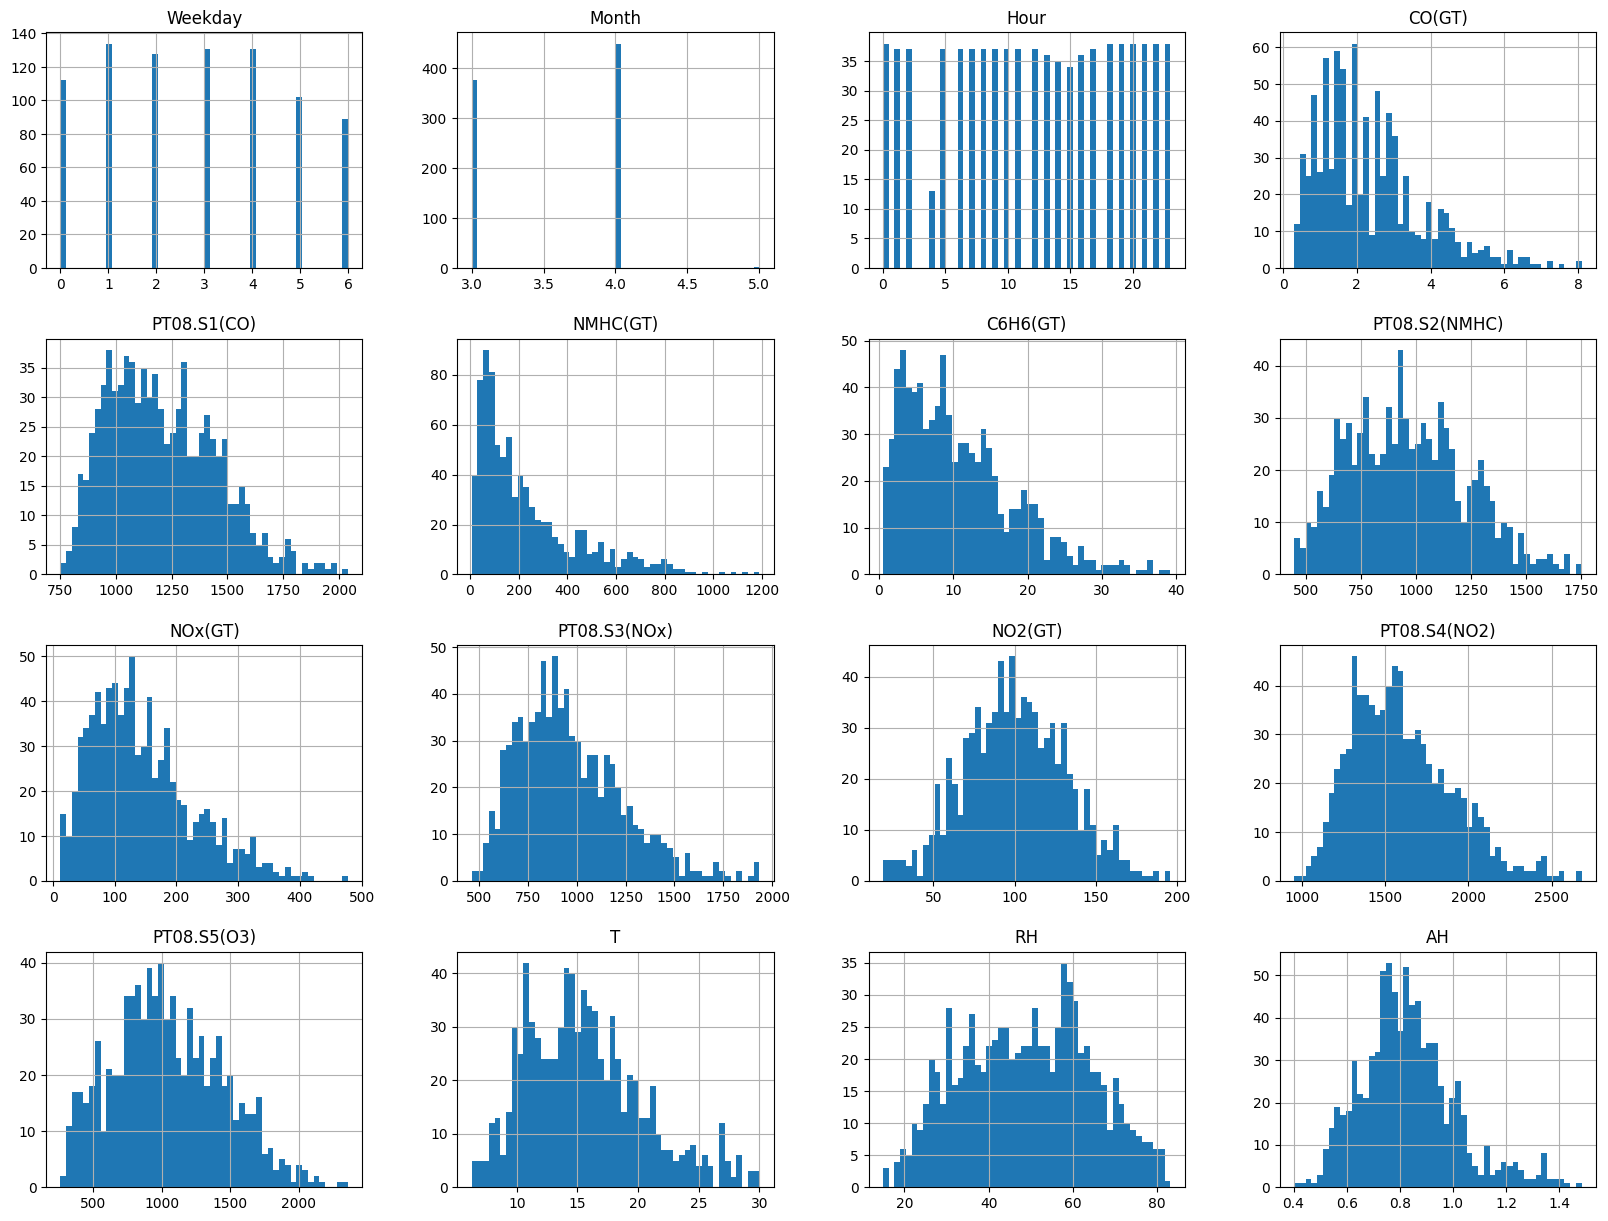

In [317]:
print("\nData Distribution:")
df.drop(columns=['Datetime']).hist(bins=50, figsize=(20, 15))
plt.show()

No outliers

### Correlation Analysis


Correlation Matrix:


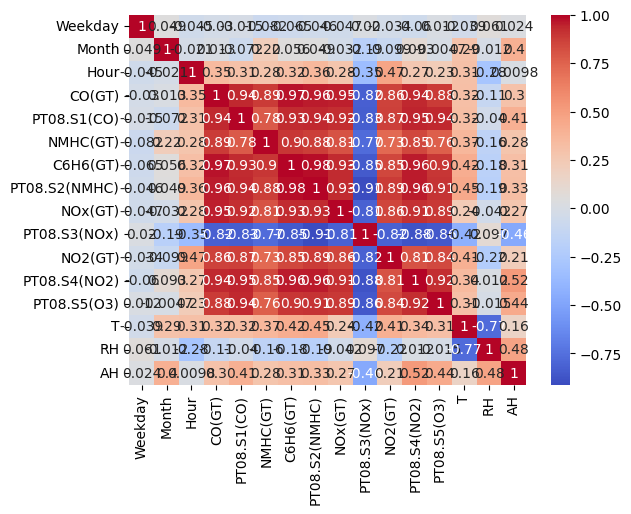

In [318]:
print("\nCorrelation Matrix:")
corr_matrix = df.drop(columns=['Datetime']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

No correlation with weekday, not useful information.

In [320]:
df = df.drop(columns=['Weekday'])